In [98]:
#Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [99]:
#Setting Whitegrid as white
%matplotlib inline
sns.set_style('whitegrid')
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
#Reading xlsx FILE
df = pd.read_excel('/content/drive/My Drive/Project_Seminar/TrainBRSocial.xlsx')

In [102]:
#CHECKING DATA IN TABULATED FORM
df.head()

,Unnamed: 0,Unnamed: 0.1,Keywords,Years,Months,impact_blog,impact_forum,impact_general,impact_image,impact_instagram,impact_news,impact_review,impact_twitter,impact_video,twitter retweets,instagram likes,sentiment_negative,sentiment_neutral,sentiment_positive,full text,hashtags,media urls,country,trend,category
0,0,2,Avocado face pack,2015,8,66,20,0,NaN,0.0,166,0,94,0,0,0,0,5,2,"['...aplicada. ""Já a vitamina E, também presen...","['[]', '[]', '[]', '[]', '[]', '[]', '[]']","['[]', '[]', '[]', '[]', '[]', '[]', '[]']",BR,nontrend,smallc
1,1,3,Avocado face pack,2015,9,0,20,0,NaN,0.0,0,0,0,0,0,0,0,0,1,"['Tem que amar em qualquer situação, não é mes...",['[]'],['[]'],BR,nontrend,smallc
2,2,4,Avocado face pack,2015,12,0,0,0,NaN,0.0,0,0,50,0,0,0,0,1,0,['Hoje foi day spa com as sobrinhas. Mascara d...,['[]'],['[]'],BR,nontrend,smallc
3,3,5,Avocado face pack,2016,2,0,0,0,NaN,0.0,52,0,46,0,0,0,0,2,0,['...em seguida aplique sobre a pele. Massagei...,"['[]', '[]']","['[]', '[]']",BR,nontrend,smallc
4,4,6,Avocado face pack,2016,3,0,0,0,NaN,0.0,0,0,123,0,0,0,0,2,1,['@poxajm da pra faze máscara com abacate e me...,"['[]', '[]', '[]']","['[]', '[]', '[]']",BR,nontrend,smallc


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7834 entries, 0 to 7833
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          7834 non-null   int64  
 1   Unnamed: 0.1        7834 non-null   int64  
 2   Keywords            7782 non-null   object 
 3   Years               7834 non-null   int64  
 4   Months              7834 non-null   int64  
 5   impact_blog         7834 non-null   int64  
 6   impact_forum        7834 non-null   int64  
 7   impact_general      7834 non-null   int64  
 8   impact_image        7043 non-null   float64
 9   impact_instagram    1810 non-null   float64
 10  impact_news         7834 non-null   int64  
 11  impact_review       7834 non-null   int64  
 12  impact_twitter      7834 non-null   int64  
 13  impact_video        7834 non-null   int64  
 14  twitter retweets    7834 non-null   int64  
 15  instagram likes     7834 non-null   int64  
 16  sentim

In [104]:
#Checking if there is any list columns with its name which contain missing values
[col for col in df.columns if df[col].isnull().any()]

['Keywords', 'impact_image', 'impact_instagram']

In [105]:
#store number of missing values per column as Series object as GM1
df1 = df.isnull().sum()

#filter out and sort columns with missing value
df1[df1>=0].sort_values(ascending=False)

impact_instagram      6024
impact_image           791
Keywords                52
category                 0
impact_review            0
Unnamed: 0.1             0
Years                    0
Months                   0
impact_blog              0
impact_forum             0
impact_general           0
impact_news              0
impact_twitter           0
trend                    0
impact_video             0
twitter retweets         0
instagram likes          0
sentiment_negative       0
sentiment_neutral        0
sentiment_positive       0
full text                0
hashtags                 0
media urls               0
country                  0
Unnamed: 0               0
dtype: int64

In [106]:
#store number of missing values per column as Series object as df1
df1 = df.isnull().sum()

#the same in percentages
df1[df1>0].sort_values(ascending=False) / len(df) * 100

##We have 77% Impact_IG which is too many missing values there. Also 10% of Impact_Image and 0.66% for keywords

impact_instagram    76.895583
impact_image        10.097013
Keywords             0.663773
dtype: float64

In [107]:
##We want to see the columns which has atleast 7000 and above observations 
GMM = df.dropna(axis='columns', thresh = 7000)

In [108]:
GMM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7834 entries, 0 to 7833
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          7834 non-null   int64  
 1   Unnamed: 0.1        7834 non-null   int64  
 2   Keywords            7782 non-null   object 
 3   Years               7834 non-null   int64  
 4   Months              7834 non-null   int64  
 5   impact_blog         7834 non-null   int64  
 6   impact_forum        7834 non-null   int64  
 7   impact_general      7834 non-null   int64  
 8   impact_image        7043 non-null   float64
 9   impact_news         7834 non-null   int64  
 10  impact_review       7834 non-null   int64  
 11  impact_twitter      7834 non-null   int64  
 12  impact_video        7834 non-null   int64  
 13  twitter retweets    7834 non-null   int64  
 14  instagram likes     7834 non-null   int64  
 15  sentiment_negative  7834 non-null   int64  
 16  sentim

In [109]:
GMM1 = GMM.dropna()
GMM1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 791 to 7833
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          6991 non-null   int64  
 1   Unnamed: 0.1        6991 non-null   int64  
 2   Keywords            6991 non-null   object 
 3   Years               6991 non-null   int64  
 4   Months              6991 non-null   int64  
 5   impact_blog         6991 non-null   int64  
 6   impact_forum        6991 non-null   int64  
 7   impact_general      6991 non-null   int64  
 8   impact_image        6991 non-null   float64
 9   impact_news         6991 non-null   int64  
 10  impact_review       6991 non-null   int64  
 11  impact_twitter      6991 non-null   int64  
 12  impact_video        6991 non-null   int64  
 13  twitter retweets    6991 non-null   int64  
 14  instagram likes     6991 non-null   int64  
 15  sentiment_negative  6991 non-null   int64  
 16  sent

In [110]:
#Verifying if we have any missing figures & Changing data type
GMM1 = GMM1.fillna(0)
GMM1['impact_image'] = GMM1['impact_image'].astype('int')
GMM1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 791 to 7833
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          6991 non-null   int64 
 1   Unnamed: 0.1        6991 non-null   int64 
 2   Keywords            6991 non-null   object
 3   Years               6991 non-null   int64 
 4   Months              6991 non-null   int64 
 5   impact_blog         6991 non-null   int64 
 6   impact_forum        6991 non-null   int64 
 7   impact_general      6991 non-null   int64 
 8   impact_image        6991 non-null   int64 
 9   impact_news         6991 non-null   int64 
 10  impact_review       6991 non-null   int64 
 11  impact_twitter      6991 non-null   int64 
 12  impact_video        6991 non-null   int64 
 13  twitter retweets    6991 non-null   int64 
 14  instagram likes     6991 non-null   int64 
 15  sentiment_negative  6991 non-null   int64 
 16  sentiment_neutral   69

In [111]:
# Drop the 'Unnamed: 0', 'Unnamed: 0.1', 'full text', 'hashtags' and 'media urls' columns
GMM1.drop(['Unnamed: 0', 'Unnamed: 0.1', 'full text', 'hashtags', 'media urls'], axis='columns', inplace=True)
GMM1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 791 to 7833
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Keywords            6991 non-null   object
 1   Years               6991 non-null   int64 
 2   Months              6991 non-null   int64 
 3   impact_blog         6991 non-null   int64 
 4   impact_forum        6991 non-null   int64 
 5   impact_general      6991 non-null   int64 
 6   impact_image        6991 non-null   int64 
 7   impact_news         6991 non-null   int64 
 8   impact_review       6991 non-null   int64 
 9   impact_twitter      6991 non-null   int64 
 10  impact_video        6991 non-null   int64 
 11  twitter retweets    6991 non-null   int64 
 12  instagram likes     6991 non-null   int64 
 13  sentiment_negative  6991 non-null   int64 
 14  sentiment_neutral   6991 non-null   int64 
 15  sentiment_positive  6991 non-null   int64 
 16  country             69

In [112]:
GMM1['trend'] = GMM1['trend'].astype('str') 
GMM1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 791 to 7833
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Keywords            6991 non-null   object
 1   Years               6991 non-null   int64 
 2   Months              6991 non-null   int64 
 3   impact_blog         6991 non-null   int64 
 4   impact_forum        6991 non-null   int64 
 5   impact_general      6991 non-null   int64 
 6   impact_image        6991 non-null   int64 
 7   impact_news         6991 non-null   int64 
 8   impact_review       6991 non-null   int64 
 9   impact_twitter      6991 non-null   int64 
 10  impact_video        6991 non-null   int64 
 11  twitter retweets    6991 non-null   int64 
 12  instagram likes     6991 non-null   int64 
 13  sentiment_negative  6991 non-null   int64 
 14  sentiment_neutral   6991 non-null   int64 
 15  sentiment_positive  6991 non-null   int64 
 16  country             69

In [113]:
# converting to binary data with column trend
GMM3 = pd.get_dummies(GMM1, columns=['trend'])
GMM3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 791 to 7833
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Keywords            6991 non-null   object
 1   Years               6991 non-null   int64 
 2   Months              6991 non-null   int64 
 3   impact_blog         6991 non-null   int64 
 4   impact_forum        6991 non-null   int64 
 5   impact_general      6991 non-null   int64 
 6   impact_image        6991 non-null   int64 
 7   impact_news         6991 non-null   int64 
 8   impact_review       6991 non-null   int64 
 9   impact_twitter      6991 non-null   int64 
 10  impact_video        6991 non-null   int64 
 11  twitter retweets    6991 non-null   int64 
 12  instagram likes     6991 non-null   int64 
 13  sentiment_negative  6991 non-null   int64 
 14  sentiment_neutral   6991 non-null   int64 
 15  sentiment_positive  6991 non-null   int64 
 16  country             69

In [114]:
GMM4 = GMM3.rename(columns = {'trend_trend': 'trend', 'trend_nontrend': 'nontrend'}, inplace = False)
GMM4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 791 to 7833
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Keywords            6991 non-null   object
 1   Years               6991 non-null   int64 
 2   Months              6991 non-null   int64 
 3   impact_blog         6991 non-null   int64 
 4   impact_forum        6991 non-null   int64 
 5   impact_general      6991 non-null   int64 
 6   impact_image        6991 non-null   int64 
 7   impact_news         6991 non-null   int64 
 8   impact_review       6991 non-null   int64 
 9   impact_twitter      6991 non-null   int64 
 10  impact_video        6991 non-null   int64 
 11  twitter retweets    6991 non-null   int64 
 12  instagram likes     6991 non-null   int64 
 13  sentiment_negative  6991 non-null   int64 
 14  sentiment_neutral   6991 non-null   int64 
 15  sentiment_positive  6991 non-null   int64 
 16  country             69

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


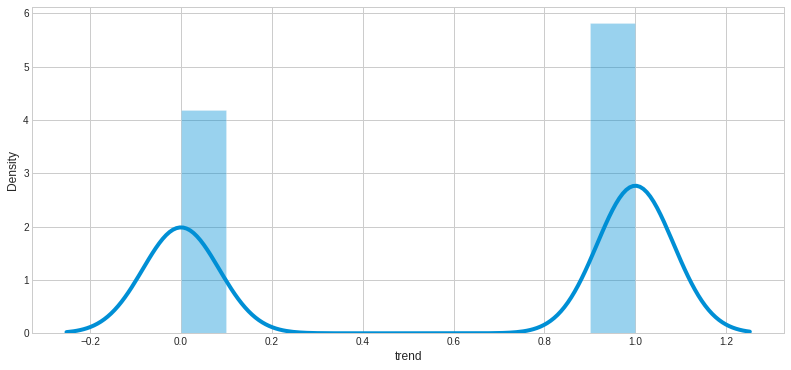

In [115]:
#Checking Distribution for all the dependent variable - trend
sns.distplot(GMM4['trend'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


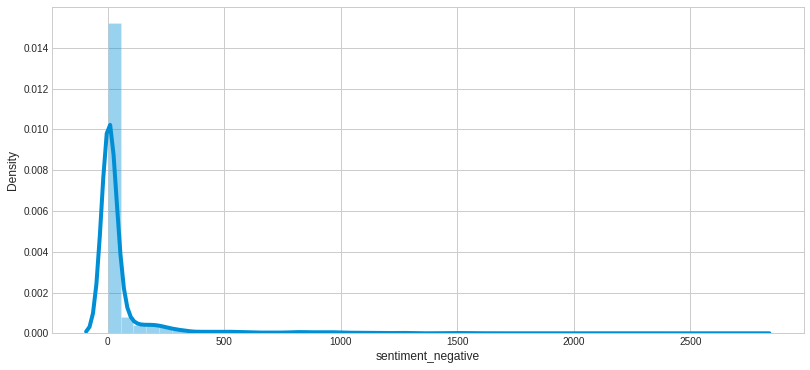

In [116]:
#Checking Distribution for some other variable - Negative Sentiment

sns.distplot(GMM4['sentiment_negative'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


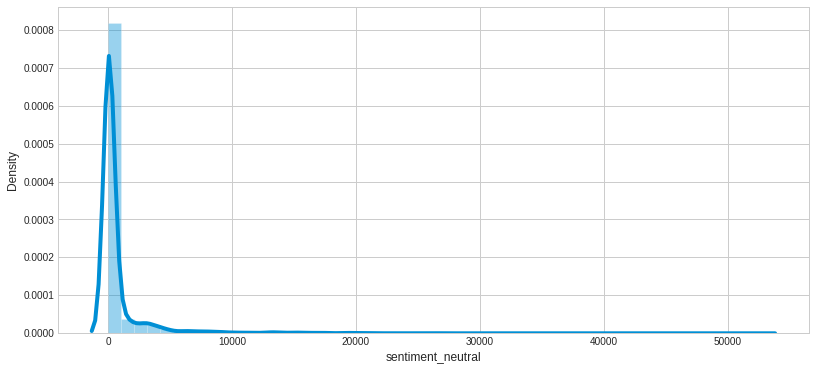

In [117]:
#Checking Distribution for some other variable - Sentiment
sns.distplot(GMM4['sentiment_neutral'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


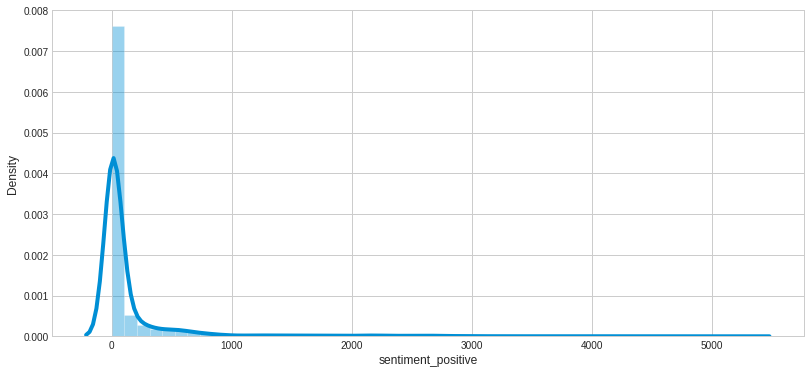

In [118]:
#Checking Distribution for some other variable - Sentiment
sns.distplot(GMM4['sentiment_positive'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


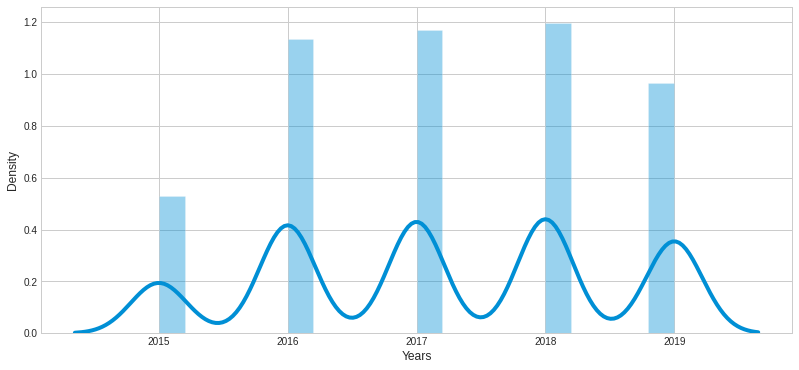

In [119]:
#Checking Distribution for some other variable - Year
##It looks normal _ Hence no need to take log
sns.distplot(GMM4['Years'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


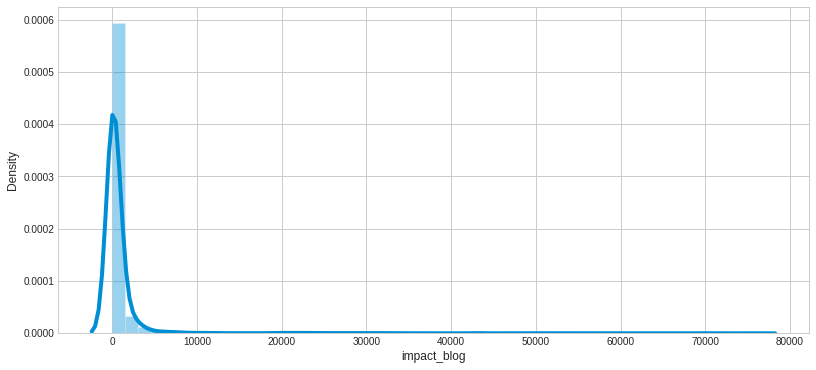

In [120]:
#Checking Distribution for some other variable - impact blog
sns.distplot(GMM4['impact_blog'])

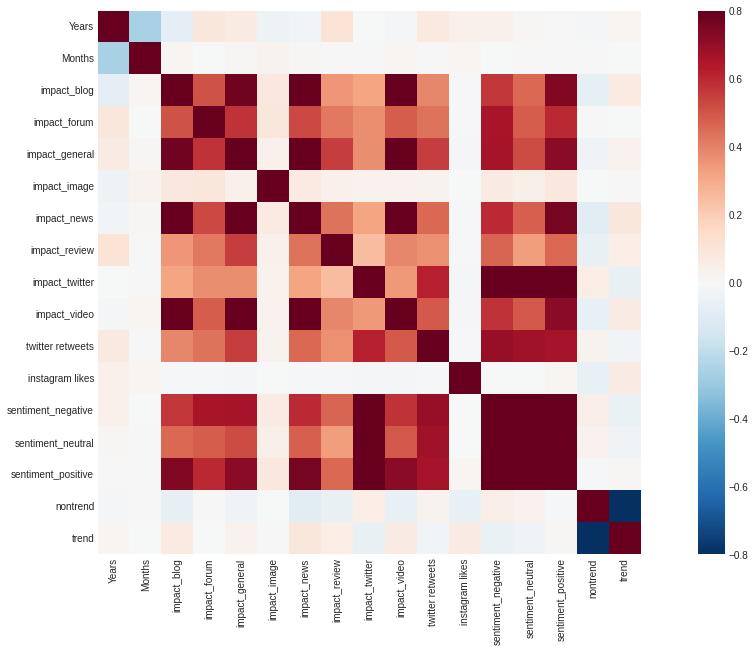

In [121]:
#correlation matrix for variables
corrmat = GMM4.corr()
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corrmat,vmin=-.8, vmax=.8, square=True, cmap='RdBu_r')

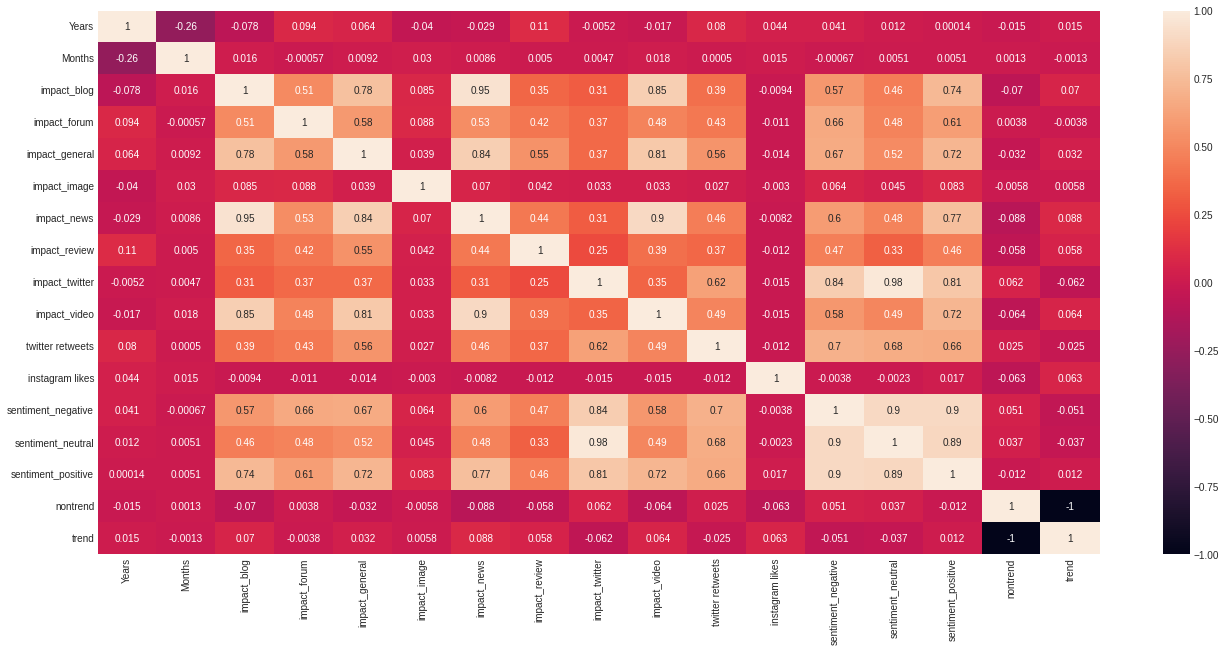

In [122]:
# Let's check the correlation between the variables 
plt.figure(figsize=(20,10)) 
sns.heatmap(GMM4.corr(), annot=True) 

In [123]:
#Creating List of Variable
my_list = list(GMM4)
print (my_list)

['Keywords', 'Years', 'Months', 'impact_blog', 'impact_forum', 'impact_general', 'impact_image', 'impact_news', 'impact_review', 'impact_twitter', 'impact_video', 'twitter retweets', 'instagram likes', 'sentiment_negative', 'sentiment_neutral', 'sentiment_positive', 'country', 'category', 'nontrend', 'trend']


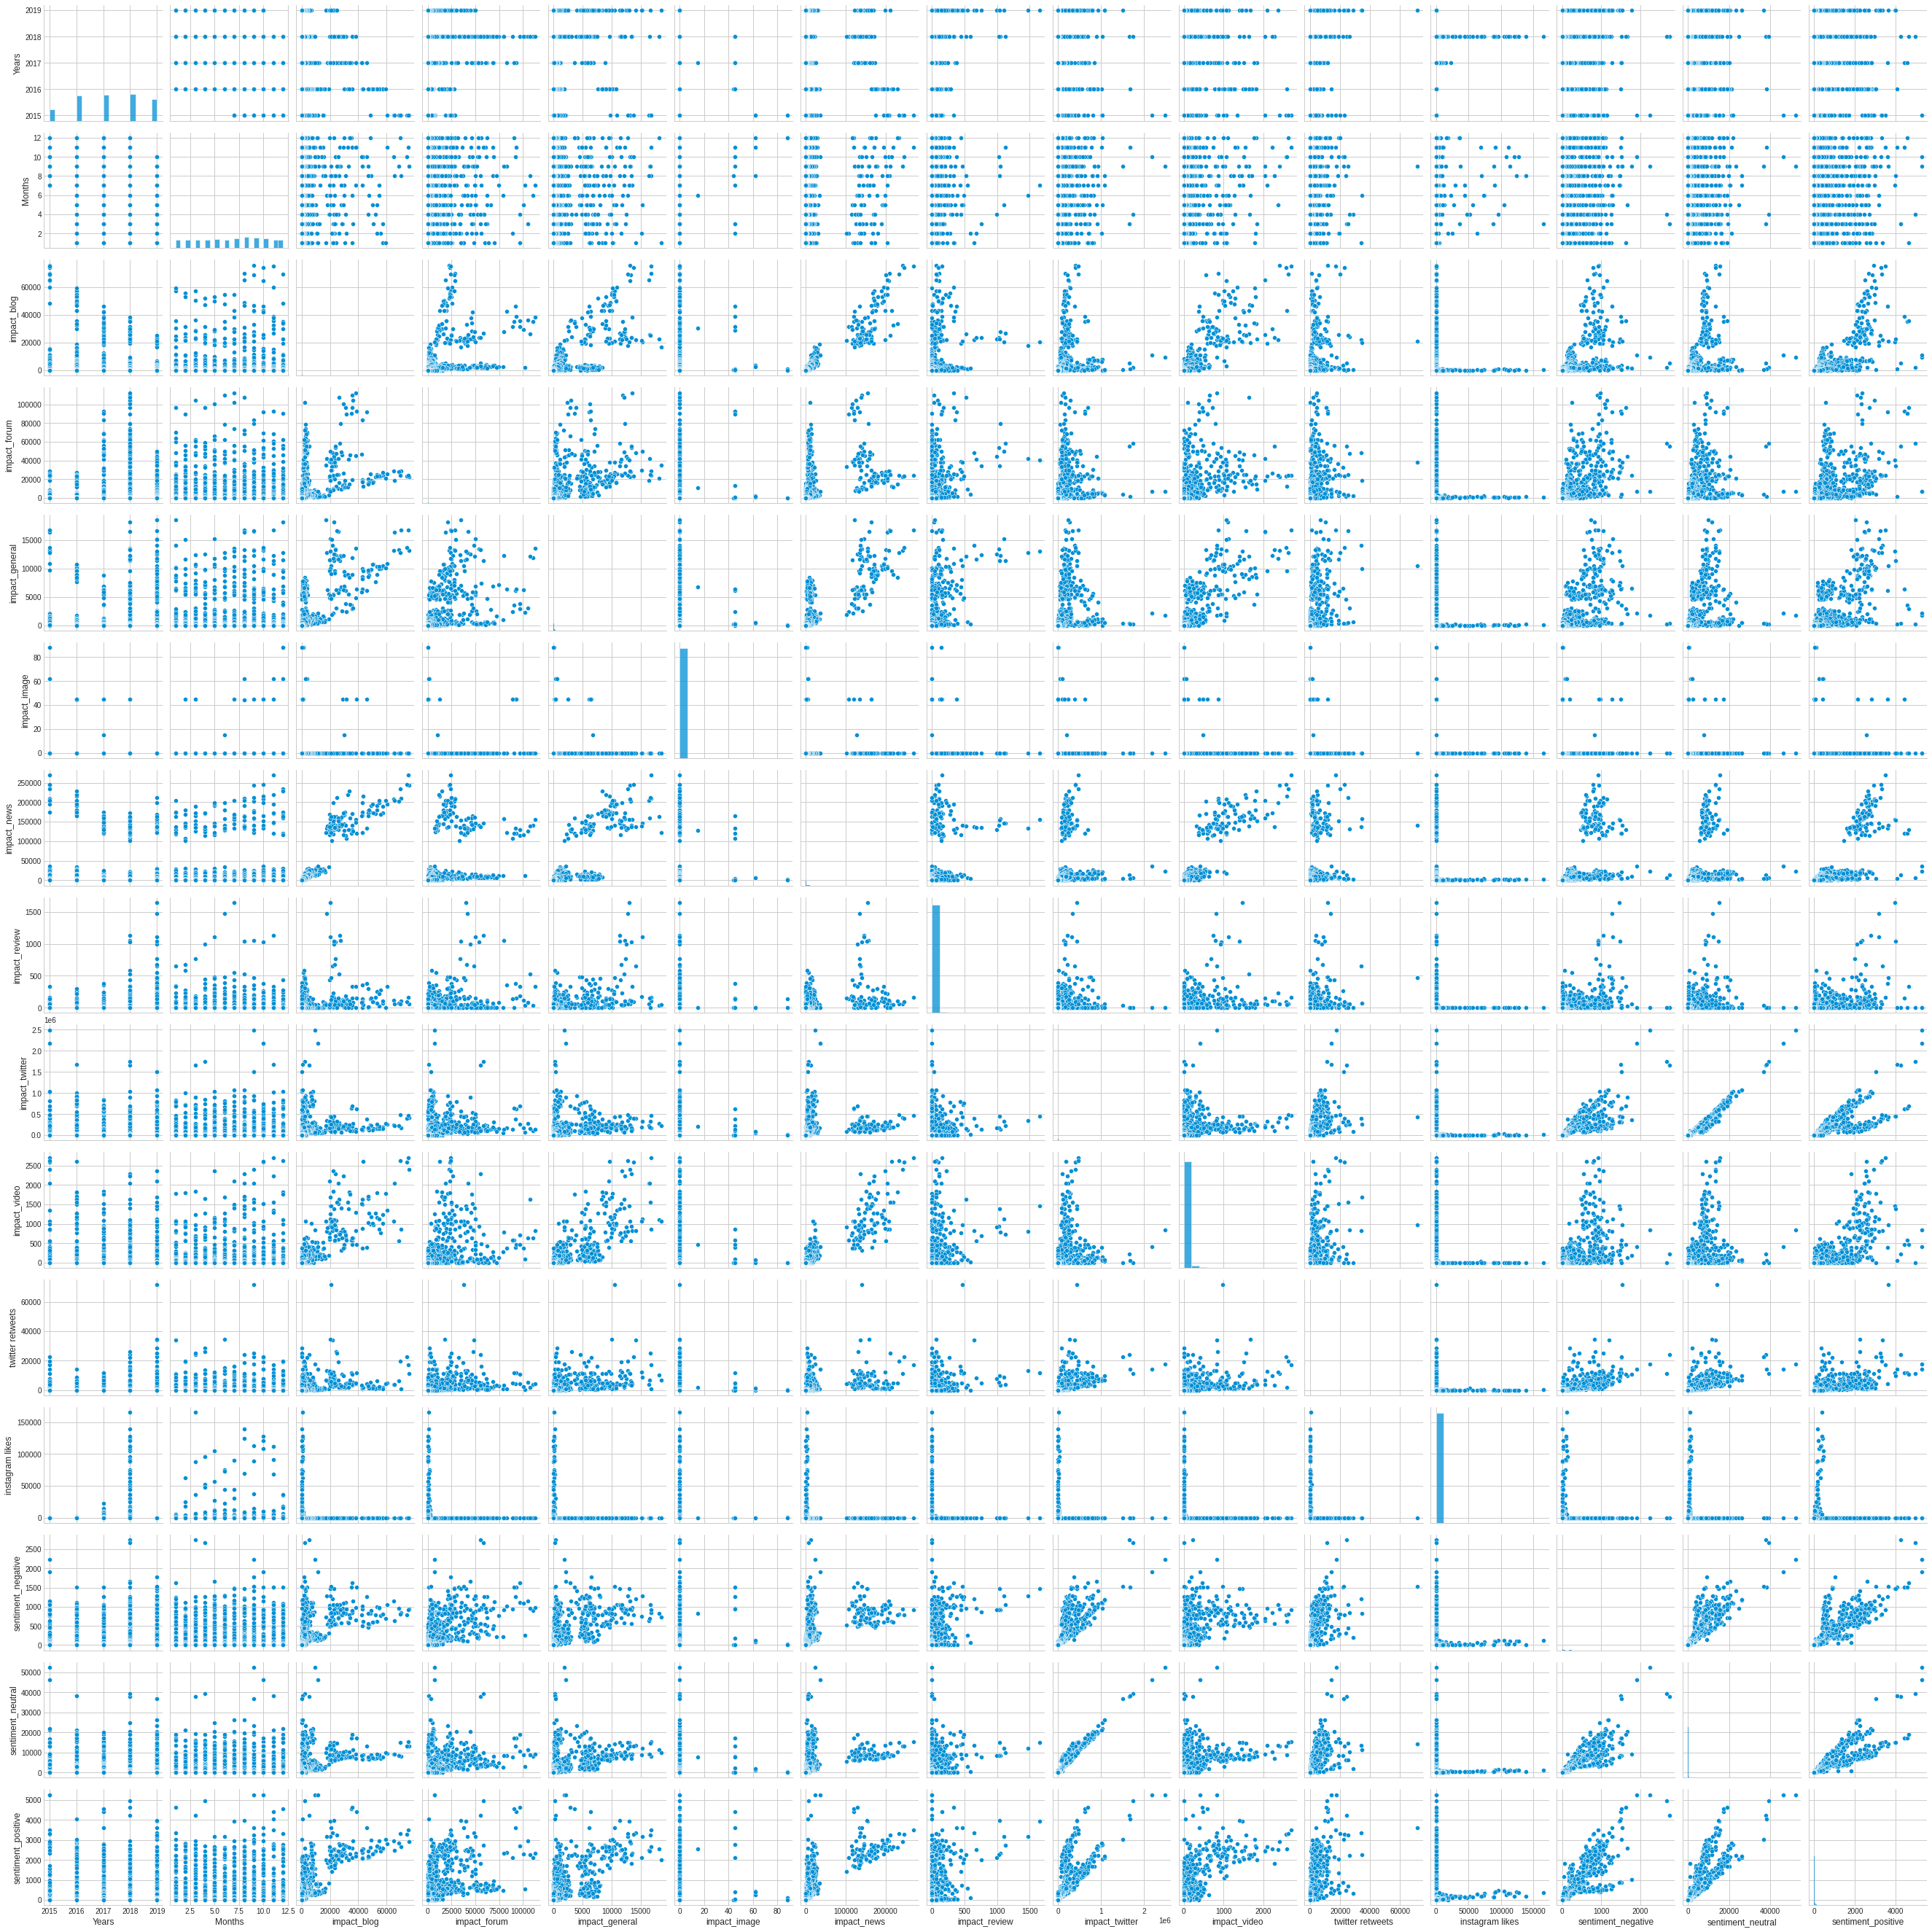

In [124]:
#scatter plots
cols = ['Years', 'Months', 'impact_blog', 'impact_forum', 'impact_general', 'impact_image', 'impact_news', 'impact_review', 'impact_twitter', 'impact_video', 'twitter retweets', 'instagram likes', 'sentiment_negative', 'sentiment_neutral', 'sentiment_positive']
sns.pairplot(GMM4[cols], height = 2.5)
plt.show()

In [125]:
#check features correlated with trend
corrmat['trend'].sort_values(ascending=False)

##We can see trend is positively correlated with impact news 

trend                 1.000000
impact_news           0.088079
impact_blog           0.069977
impact_video          0.063763
instagram likes       0.063261
impact_review         0.058484
impact_general        0.032056
Years                 0.015404
sentiment_positive    0.011825
impact_image          0.005848
Months               -0.001314
impact_forum         -0.003760
twitter retweets     -0.025226
sentiment_neutral    -0.036700
sentiment_negative   -0.050543
impact_twitter       -0.061806
nontrend             -1.000000
Name: trend, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


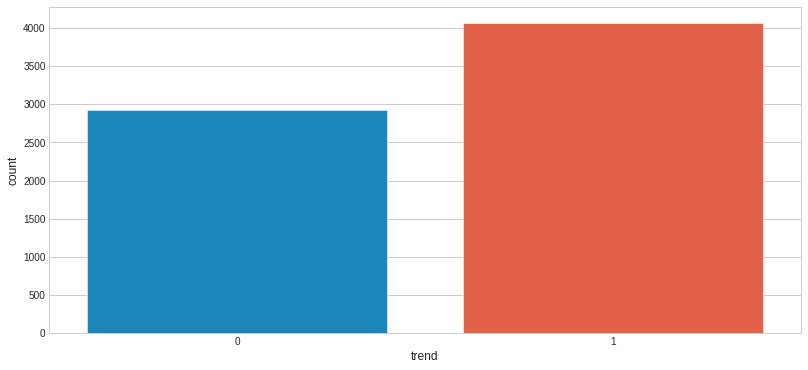

In [126]:
#Counting Trend and Non Trend Number
sns.countplot(GMM4['trend'], label = "Count")

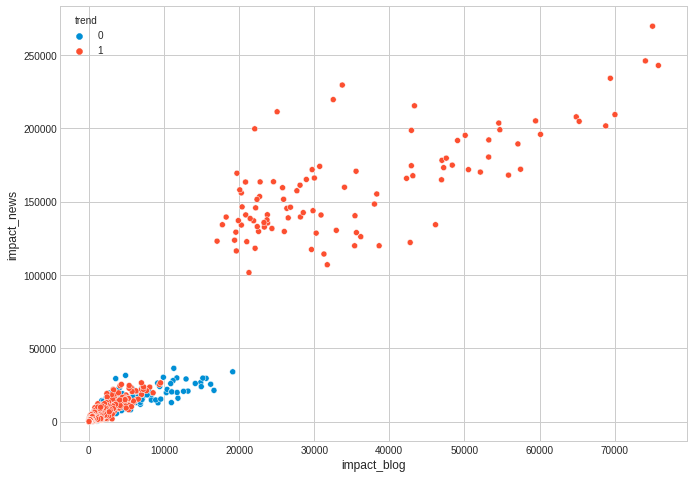

In [127]:
#Checking trend with impact_blog and impact_news
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'impact_blog', y = 'impact_news', hue = 'trend', data = GMM4)

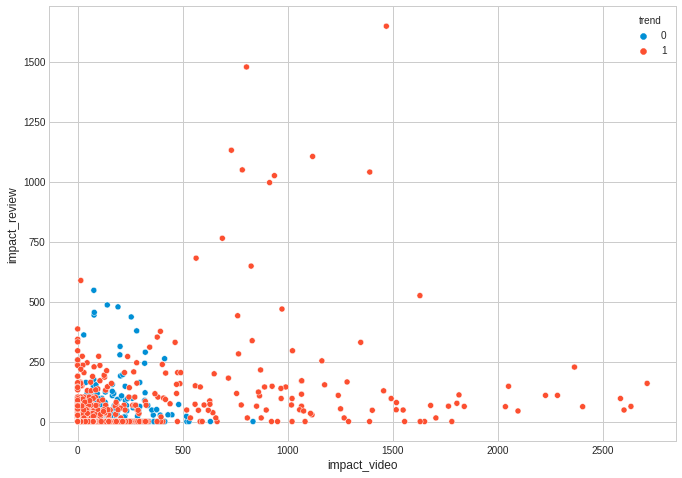

In [128]:
#Checking trend with impact review and impact video
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'impact_video', y = 'impact_review', hue = 'trend', data = GMM4)

In [129]:
#EVERYTHING IS GOOD HERE##

In [130]:
#taking all variables for test except these
X = GMM4.drop(['trend', 'nontrend', 'country', 'category', 'Keywords'], axis=1)
y = GMM4.trend

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

'X' shape: (6991, 15)
'y' shape: (6991,)


In [131]:
X_train = X
y_train = y

In [132]:
# split X and y into training and testing sets
##Change this please test_size <0.6-0.8> random_state <0-5>
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.28,random_state=0)

In [133]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000000)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [134]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 145,  677],
       [  71, 1065]])

Text(0.5, 384.16, 'Predicted label')

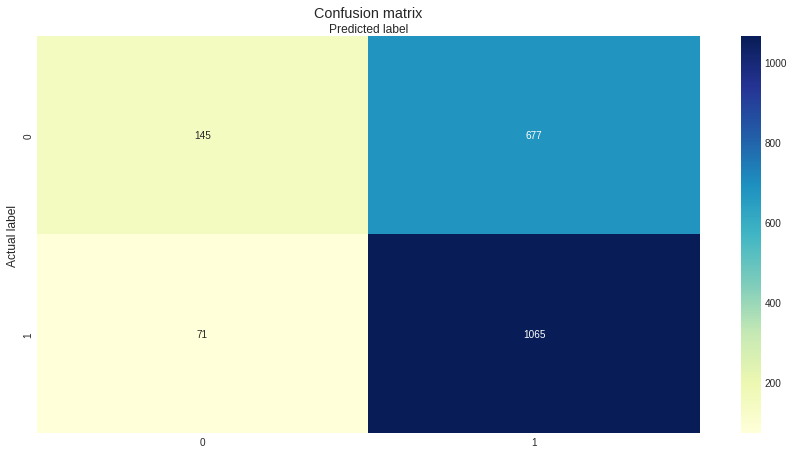

In [135]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [136]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6179775280898876
Precision: 0.6113662456946038
Recall: 0.9375


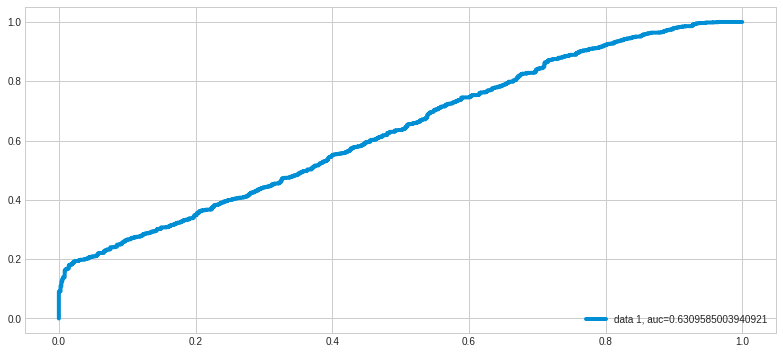

In [137]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [138]:
# Importing libraries for scaling
from sklearn.preprocessing import StandardScaler

In [139]:
GMM4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 791 to 7833
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Keywords            6991 non-null   object
 1   Years               6991 non-null   int64 
 2   Months              6991 non-null   int64 
 3   impact_blog         6991 non-null   int64 
 4   impact_forum        6991 non-null   int64 
 5   impact_general      6991 non-null   int64 
 6   impact_image        6991 non-null   int64 
 7   impact_news         6991 non-null   int64 
 8   impact_review       6991 non-null   int64 
 9   impact_twitter      6991 non-null   int64 
 10  impact_video        6991 non-null   int64 
 11  twitter retweets    6991 non-null   int64 
 12  instagram likes     6991 non-null   int64 
 13  sentiment_negative  6991 non-null   int64 
 14  sentiment_neutral   6991 non-null   int64 
 15  sentiment_positive  6991 non-null   int64 
 16  country             69

In [140]:
X

,Years,Months,impact_blog,impact_forum,impact_general,impact_image,impact_news,impact_review,impact_twitter,impact_video,twitter retweets,instagram likes,sentiment_negative,sentiment_neutral,sentiment_positive
791,2018,7,0,0,0,0,35,0,0,0,0,0,1,0,0
792,2015,7,95,46,0,0,179,0,1373,0,2,0,2,31,7
793,2015,8,3392,1023,463,62,7252,0,56811,25,120,0,85,1321,242
794,2015,9,3541,1395,557,0,5674,0,99578,80,409,0,178,2037,417
795,2015,10,3075,1423,429,0,6034,0,94442,79,587,0,191,1919,391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7829,2019,6,0,0,0,0,15,0,0,0,0,0,0,0,1
7830,2019,7,0,0,0,0,0,0,24,0,0,0,0,1,0
7831,2019,8,0,0,0,0,0,0,68,0,0,0,1,0,1
7832,2019,9,0,0,0,0,46,0,0,0,0,0,0,0,1


In [141]:
scaler = StandardScaler()
X[['impact_blog', 'impact_forum', 'impact_general', 'impact_image', 'impact_news', 'impact_review', 'impact_twitter', 'impact_video', 'twitter retweets', 'instagram likes', 'sentiment_negative', 'sentiment_neutral', 'sentiment_positive']] = scaler.fit_transform(X[['impact_blog', 'impact_forum', 'impact_general', 'impact_image', 'impact_news', 'impact_review', 'impact_twitter', 'impact_video', 'twitter retweets', 'instagram likes', 'sentiment_negative', 'sentiment_neutral', 'sentiment_positive']])

In [142]:
X.head()

,Years,Months,impact_blog,impact_forum,impact_general,impact_image,impact_news,impact_review,impact_twitter,impact_video,twitter retweets,instagram likes,sentiment_negative,sentiment_neutral,sentiment_positive
791,2018,7,-0.206878,-0.243301,-0.230871,-0.043890,-0.196169,-0.161551,-0.287488,-0.210266,-0.213317,-0.074673,-0.321250,-0.304269,-0.337215
792,2015,7,-0.186784,-0.237279,-0.230871,-0.043890,-0.188817,-0.161551,-0.274620,-0.210266,-0.212303,-0.074673,-0.315743,-0.292309,-0.320383
793,2015,8,0.510579,-0.109377,0.105561,24.314142,0.172272,-0.161551,0.244961,-0.056275,-0.152430,-0.074673,0.141341,0.205382,0.244683
794,2015,9,0.542095,-0.060677,0.173865,-0.043890,0.091712,-0.161551,0.645785,0.282506,-0.005791,-0.074673,0.653495,0.481621,0.665478
795,2015,10,0.443529,-0.057011,0.080856,-0.043890,0.110091,-0.161551,0.597649,0.276347,0.084526,-0.074673,0.725087,0.436095,0.602960


In [143]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.27,random_state=0)

In [144]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=10000)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [145]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 102,  682],
       [  51, 1053]])

Text(0.5, 384.16, 'Predicted label')

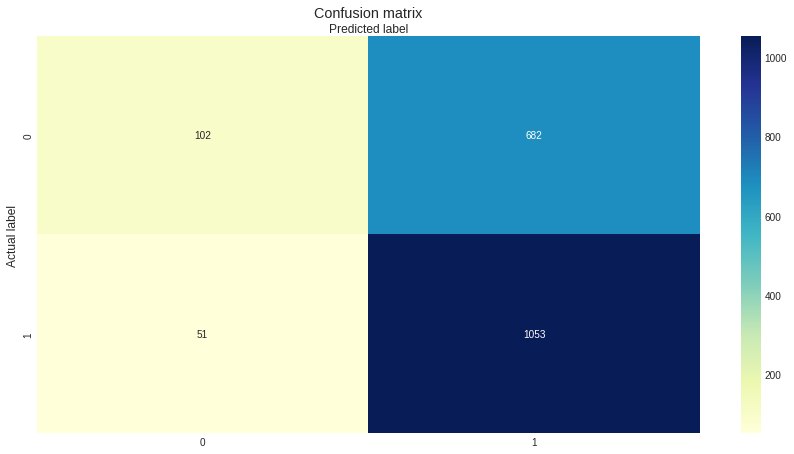

In [146]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [147]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6117584745762712
Precision: 0.6069164265129683
Recall: 0.9538043478260869


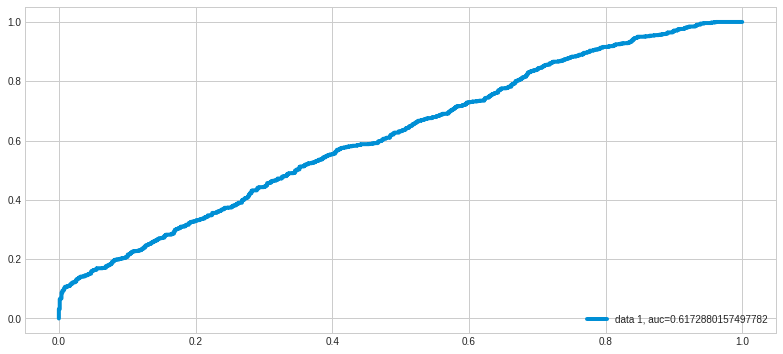

In [148]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Now Making Predictions on New Data Set

In [149]:
#Now Loading Test Data
#Reading xlsx FILE
cf = pd.read_excel('/content/drive/My Drive/Project_Seminar/Test/HoldoutBRSocial.xlsx')
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776 entries, 0 to 2775
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2776 non-null   int64  
 1   Keywords            2776 non-null   object 
 2   Years               2776 non-null   int64  
 3   Months              2776 non-null   int64  
 4   impact_blog         2776 non-null   int64  
 5   impact_forum        2776 non-null   int64  
 6   impact_general      2776 non-null   int64  
 7   impact_image        2557 non-null   float64
 8   impact_instagram    573 non-null    float64
 9   impact_news         2776 non-null   int64  
 10  impact_review       2776 non-null   int64  
 11  impact_twitter      2776 non-null   int64  
 12  impact_video        2776 non-null   int64  
 13  twitter retweets    2776 non-null   int64  
 14  instagram likes     2776 non-null   int64  
 15  sentiment_negative  2776 non-null   int64  
 16  sentim

In [150]:
##We want to see the columns which has atleast 2000 and above observations 
CMM = cf.dropna(axis='columns', thresh = 2000)

In [151]:
# Drop the 'Unnamed: 0', 'full text', 'hashtags' and 'media urls' columns
CMM.drop(['Unnamed: 0', 'full text', 'hashtags', 'media urls'], axis='columns', inplace=True)
CMM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776 entries, 0 to 2775
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keywords            2776 non-null   object 
 1   Years               2776 non-null   int64  
 2   Months              2776 non-null   int64  
 3   impact_blog         2776 non-null   int64  
 4   impact_forum        2776 non-null   int64  
 5   impact_general      2776 non-null   int64  
 6   impact_image        2557 non-null   float64
 7   impact_news         2776 non-null   int64  
 8   impact_review       2776 non-null   int64  
 9   impact_twitter      2776 non-null   int64  
 10  impact_video        2776 non-null   int64  
 11  twitter retweets    2776 non-null   int64  
 12  instagram likes     2776 non-null   int64  
 13  sentiment_negative  2776 non-null   int64  
 14  sentiment_neutral   2776 non-null   int64  
 15  sentiment_positive  2776 non-null   int64  
 16  countr

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [152]:
#Verifying if we have any missing figures & Changing data type
CMM1 = CMM.fillna(0)
CMM1['impact_image'] = CMM1['impact_image'].astype('int')
CMM1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776 entries, 0 to 2775
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Keywords            2776 non-null   object
 1   Years               2776 non-null   int64 
 2   Months              2776 non-null   int64 
 3   impact_blog         2776 non-null   int64 
 4   impact_forum        2776 non-null   int64 
 5   impact_general      2776 non-null   int64 
 6   impact_image        2776 non-null   int64 
 7   impact_news         2776 non-null   int64 
 8   impact_review       2776 non-null   int64 
 9   impact_twitter      2776 non-null   int64 
 10  impact_video        2776 non-null   int64 
 11  twitter retweets    2776 non-null   int64 
 12  instagram likes     2776 non-null   int64 
 13  sentiment_negative  2776 non-null   int64 
 14  sentiment_neutral   2776 non-null   int64 
 15  sentiment_positive  2776 non-null   int64 
 16  country             2776

In [153]:
#taking all variables for test
z_test = CMM1.drop(['country', 'category', 'Keywords'], axis=1)
z_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776 entries, 0 to 2775
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Years               2776 non-null   int64
 1   Months              2776 non-null   int64
 2   impact_blog         2776 non-null   int64
 3   impact_forum        2776 non-null   int64
 4   impact_general      2776 non-null   int64
 5   impact_image        2776 non-null   int64
 6   impact_news         2776 non-null   int64
 7   impact_review       2776 non-null   int64
 8   impact_twitter      2776 non-null   int64
 9   impact_video        2776 non-null   int64
 10  twitter retweets    2776 non-null   int64
 11  instagram likes     2776 non-null   int64
 12  sentiment_negative  2776 non-null   int64
 13  sentiment_neutral   2776 non-null   int64
 14  sentiment_positive  2776 non-null   int64
dtypes: int64(15)
memory usage: 325.4 KB


In [154]:
#taking all variables and full data for test 
X = GMM4.drop(['trend', 'nontrend', 'country', 'category', 'Keywords'], axis=1)
y = GMM4.trend

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

'X' shape: (6991, 15)
'y' shape: (6991,)


In [155]:
X_train = X
y_train = y

In [156]:
#Create New Model 
logreg1 = LogisticRegression(max_iter=3000)

# fit the model with full data
logreg1.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [157]:
predictions = logreg1.predict(z_test)

In [158]:
predictions1 = pd.DataFrame(predictions, columns=['trend'])
predictions1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776 entries, 0 to 2775
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   trend   2776 non-null   uint8
dtypes: uint8(1)
memory usage: 2.8 KB


In [159]:
new_file = pd.concat([CMM1, predictions1], axis =1)
new_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776 entries, 0 to 2775
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Keywords            2776 non-null   object
 1   Years               2776 non-null   int64 
 2   Months              2776 non-null   int64 
 3   impact_blog         2776 non-null   int64 
 4   impact_forum        2776 non-null   int64 
 5   impact_general      2776 non-null   int64 
 6   impact_image        2776 non-null   int64 
 7   impact_news         2776 non-null   int64 
 8   impact_review       2776 non-null   int64 
 9   impact_twitter      2776 non-null   int64 
 10  impact_video        2776 non-null   int64 
 11  twitter retweets    2776 non-null   int64 
 12  instagram likes     2776 non-null   int64 
 13  sentiment_negative  2776 non-null   int64 
 14  sentiment_neutral   2776 non-null   int64 
 15  sentiment_positive  2776 non-null   int64 
 16  country             2776

In [160]:
from google.colab import files
new_file.to_csv('file_name_BR_LG.csv') 
files.download('file_name_BR_LG.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [161]:
#SO FAR SO GOOD HERE

In [162]:
pip install xgboost

In [163]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [164]:
#lets start with the default hyperparameters and hold-out mechanism for train/test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

#XGBoost
xgb_mdl = XGBClassifier().fit(X_train.values,y_train.values)
xgb_mdl

XGBClassifier()

Train Data Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.52      0.62      2197
           1       0.72      0.88      0.79      3046

    accuracy                           0.73      5243
   macro avg       0.74      0.70      0.70      5243
weighted avg       0.73      0.73      0.72      5243

Test Data Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.48      0.56       724
           1       0.69      0.83      0.76      1024

    accuracy                           0.69      1748
   macro avg       0.68      0.66      0.66      1748
weighted avg       0.68      0.69      0.67      1748



[Text(51.620000000000005, 0.5, 'real values'),
 Text(0.5, 36.5, 'predicted values'),
 Text(0.5, 1.0, 'Confusion Matrix')]

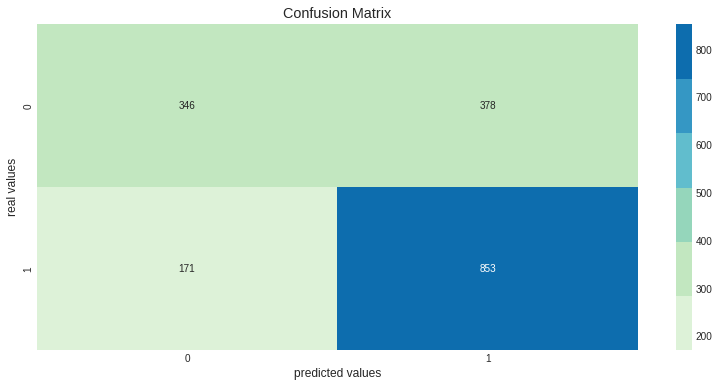

In [165]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, average_precision_score

#XGBoost
y_pred_train = xgb_mdl.predict(X_train.values)
y_pred = xgb_mdl.predict(X_test.values)

print("Train Data Classification Report:\n")
print(classification_report(y_train,y_pred_train))

print("Test Data Classification Report:\n")
print(classification_report(y_test,y_pred))

#generate a confusion matrix to visualise precision, recall, misclassification and false alarms
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = list(set(y)), columns = list(set(y)))

#visualise the confusion matrix in the heatmap form
plt.figure()
sns.heatmap(cm, annot = True, fmt="d",
            cmap=sns.color_palette("GnBu")).set(xlabel='predicted values', 
                                                ylabel='real values', 
                                                title = 'Confusion Matrix')

In [166]:
##Gradient Boosting Work better

In [167]:
#taking all variables for test
X = GMM4.drop(['trend', 'nontrend', 'country', 'category', 'Keywords'], axis=1)
y = GMM4.trend

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

X_train = X
y_train = y

'X' shape: (6991, 15)
'y' shape: (6991,)


In [168]:
#XGBoost
xgb_mdl1 = XGBClassifier().fit(X_train,y_train)
xgb_mdl1

XGBClassifier()

In [169]:
predictions_xgb = xgb_mdl1.predict(z_test)

In [170]:
predictions_xgb1 = pd.DataFrame(predictions_xgb, columns=['trend'])
predictions_xgb1

,trend
0,1
1,1
2,1
3,1
4,1
...,...
2771,1
2772,1
2773,1
2774,1


In [171]:
new_file_xgb = pd.concat([CMM1, predictions_xgb1], axis =1)
new_file_xgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776 entries, 0 to 2775
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Keywords            2776 non-null   object
 1   Years               2776 non-null   int64 
 2   Months              2776 non-null   int64 
 3   impact_blog         2776 non-null   int64 
 4   impact_forum        2776 non-null   int64 
 5   impact_general      2776 non-null   int64 
 6   impact_image        2776 non-null   int64 
 7   impact_news         2776 non-null   int64 
 8   impact_review       2776 non-null   int64 
 9   impact_twitter      2776 non-null   int64 
 10  impact_video        2776 non-null   int64 
 11  twitter retweets    2776 non-null   int64 
 12  instagram likes     2776 non-null   int64 
 13  sentiment_negative  2776 non-null   int64 
 14  sentiment_neutral   2776 non-null   int64 
 15  sentiment_positive  2776 non-null   int64 
 16  country             2776

In [172]:
from google.colab import files
new_file_xgb.to_csv('new_file_BR_xgb.csv') 
files.download('new_file_BR_xgb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [173]:
#Everything is good here

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
from sklearn import datasets

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score



from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
from mlxtend.regressor import StackingCVRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostRegressor

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30
                                                    , stratify=y)

In [176]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=3000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [177]:
# Initialize individual models
clf_1 = KNeighborsClassifier()
clf_2 = LogisticRegression(max_iter=3000)
clf_3 = DecisionTreeClassifier()

In [178]:
# Create trend classifier
voting_ens = VotingClassifier(
    estimators=[('knn', clf_1), ('lr', clf_2), ('dt', clf_3)], voting='hard')

In [179]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.6382268827454719
LogisticRegression 0.617254528122021
DecisionTreeClassifier 0.6444232602478551
VotingClassifier 0.6715919923736893


In [198]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, precision_score(y_test, y_pred))

KNeighborsClassifier 0.8012769353551477
LogisticRegression 0.6094329623741388
DecisionTreeClassifier 0.9983579638752053
VotingClassifier 0.8450704225352113


In [199]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, recall_score(y_test, y_pred))

KNeighborsClassifier 0.8222768222768223
LogisticRegression 0.9418509418509419
DecisionTreeClassifier 0.9959049959049959
VotingClassifier 0.9828009828009828


In [200]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, f1_score(y_test, y_pred))

KNeighborsClassifier 0.8116410670978174
LogisticRegression 0.74002574002574
DecisionTreeClassifier 0.997129971299713
VotingClassifier 0.9087466868610375


In [180]:
#Now Using Ensemble Modeling

In [181]:
#taking all variables for test
X = GMM4.drop(['trend', 'nontrend', 'country', 'category', 'Keywords'], axis=1)
y = GMM4.trend

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

X_train = X
y_train = y

'X' shape: (6991, 15)
'y' shape: (6991,)


In [182]:
# Initialize individual models
clf_1 = KNeighborsClassifier()
clf_2 = LogisticRegression(max_iter=3000)
clf_3 = DecisionTreeClassifier()

In [183]:
# Create trend classifier
voting_ens = VotingClassifier(
    estimators=[('knn', clf_1), ('lr', clf_2), ('dt', clf_3)], voting='hard')

In [184]:
for clf in (clf_1, clf_2, clf_3, voting_ens):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(z_test)

In [185]:
#Ensembling
predictions_ensem = pd.DataFrame(y_pred, columns=['trend'])
predictions_ensem

,trend
0,1
1,0
2,1
3,1
4,0
...,...
2771,1
2772,1
2773,1
2774,1


In [186]:
new_file_ensem = pd.concat([CMM1, predictions_ensem], axis =1)
new_file_ensem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776 entries, 0 to 2775
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Keywords            2776 non-null   object
 1   Years               2776 non-null   int64 
 2   Months              2776 non-null   int64 
 3   impact_blog         2776 non-null   int64 
 4   impact_forum        2776 non-null   int64 
 5   impact_general      2776 non-null   int64 
 6   impact_image        2776 non-null   int64 
 7   impact_news         2776 non-null   int64 
 8   impact_review       2776 non-null   int64 
 9   impact_twitter      2776 non-null   int64 
 10  impact_video        2776 non-null   int64 
 11  twitter retweets    2776 non-null   int64 
 12  instagram likes     2776 non-null   int64 
 13  sentiment_negative  2776 non-null   int64 
 14  sentiment_neutral   2776 non-null   int64 
 15  sentiment_positive  2776 non-null   int64 
 16  country             2776

In [187]:
from google.colab import files
new_file_ensem.to_csv('new_file_BR_ensem.csv') 
files.download('new_file_BR_ensem.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [188]:
# Filter out columns of our interest in ensem
pf_ensem = new_file_ensem.loc[:, ["Keywords", "trend"]]
pf_ensem

,Keywords,trend
0,Aloe vera cleanser,1
1,Aloe vera cleanser,0
2,Bee venom face cream,1
3,Bee venom face cream,1
4,Honey facial cleanser,0
...,...,...
2771,vegetable chips,1
2772,vegetable chips,1
2773,vegetable chips,1
2774,vegetable chips,1


In [189]:
# Filter out columns of our interest in xgb
pf_xgb = new_file_xgb.loc[:, ["Keywords", "trend"]]
pf_xgb

,Keywords,trend
0,Aloe vera cleanser,1
1,Aloe vera cleanser,1
2,Bee venom face cream,1
3,Bee venom face cream,1
4,Honey facial cleanser,1
...,...,...
2771,vegetable chips,1
2772,vegetable chips,1
2773,vegetable chips,1
2774,vegetable chips,1


In [190]:
# Filter out columns of our interest in xgb
pf_lg = new_file.loc[:, ["Keywords", "trend"]]
pf_lg

,Keywords,trend
0,Aloe vera cleanser,1
1,Aloe vera cleanser,1
2,Bee venom face cream,1
3,Bee venom face cream,1
4,Honey facial cleanser,1
...,...,...
2771,vegetable chips,1
2772,vegetable chips,1
2773,vegetable chips,1
2774,vegetable chips,1


In [191]:
result = pd.concat([pf_ensem, pf_xgb, pf_lg], axis=1)
result.columns = ['Keywords', 'ensem_trend', 'Keywords2', 'xgb_trend', 'Keywords3', 'lg_trend']
all_model = result.drop(['Keywords2', 'Keywords3'], axis=1)

In [192]:
all_model

,Keywords,ensem_trend,xgb_trend,lg_trend
0,Aloe vera cleanser,1,1,1
1,Aloe vera cleanser,0,1,1
2,Bee venom face cream,1,1,1
3,Bee venom face cream,1,1,1
4,Honey facial cleanser,0,1,1
...,...,...,...,...
2771,vegetable chips,1,1,1
2772,vegetable chips,1,1,1
2773,vegetable chips,1,1,1
2774,vegetable chips,1,1,1


In [193]:
cols_to_sum = all_model.columns[ : all_model.shape[0]-0]
cols_to_sum
all_model['total_count'] = all_model[cols_to_sum].sum(axis=1)

In [194]:
# create a list of our conditions
conditions = [
    (all_model['total_count'] < 2),
    (all_model['total_count'] >= 2)
    ]
# create a list of the values we want to assign for each condition
values = ['no trend', 'trend']

# create a new column and use np.select to assign values to it using our lists as arguments
all_model['trend?'] = np.select(conditions, values)

# display updated DataFrame
all_model

,Keywords,ensem_trend,xgb_trend,lg_trend,total_count,trend?
0,Aloe vera cleanser,1,1,1,3,trend
1,Aloe vera cleanser,0,1,1,2,trend
2,Bee venom face cream,1,1,1,3,trend
3,Bee venom face cream,1,1,1,3,trend
4,Honey facial cleanser,0,1,1,2,trend
...,...,...,...,...,...,...
2771,vegetable chips,1,1,1,3,trend
2772,vegetable chips,1,1,1,3,trend
2773,vegetable chips,1,1,1,3,trend
2774,vegetable chips,1,1,1,3,trend


In [195]:
all_model1 = all_model.groupby(['Keywords'])['trend?'].agg(pd.Series.mode).reset_index()

In [196]:
from google.colab import files
all_model1.to_csv('all_model1.csv') 
files.download('all_model1.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**That's all folks**